# Bank Customer Churn Prediction 


## Problem Statement

## Overview

This project involves building a machine learning model to predict whether a bank customer will leave the bank (churn) or not, based on a variety of features such as gender, age, account balance, and other details. The model was trained using three classifiers: Logistic Regression, Decision Tree, and Random Forest. After training and evaluating each model, the Random Forest model was selected as the best-performing model.

The model was then serialized using pickle to make predictions on new customer data.

## Methodology and Steps involed

### 1.Importing the useful library

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

## 2.Data Loading and Preprocessing

In [57]:
churn_data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [58]:
churn_data.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
# Show dataset information
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [60]:
# Drop customer_id column as it is not useful for prediction
churn_data.drop('customer_id', axis=1, inplace=True)
churn_data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3.Exploratory Data Analysis (EDA)

### Categorical Data Visualization (Gender and Churn)

<Axes: xlabel='gender', ylabel='count'>

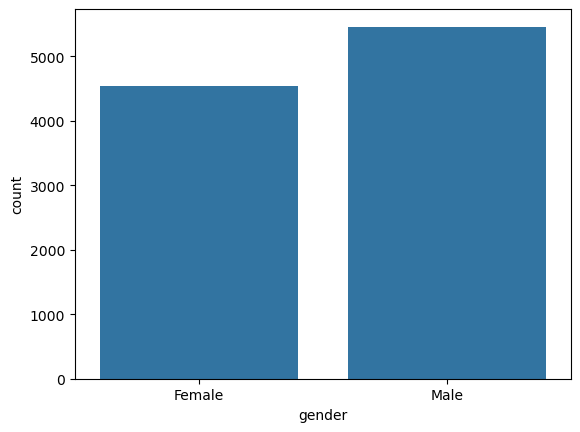

In [63]:
sns.countplot(x='gender', data=churn_data)



<Axes: ylabel='count'>

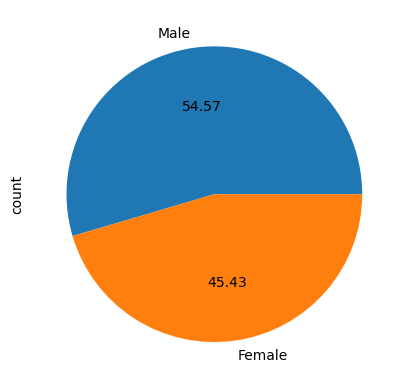

In [64]:
# Pie chart for gender distribution
churn_data['gender'].value_counts().plot.pie(autopct='%.2f')


<Axes: xlabel='gender'>

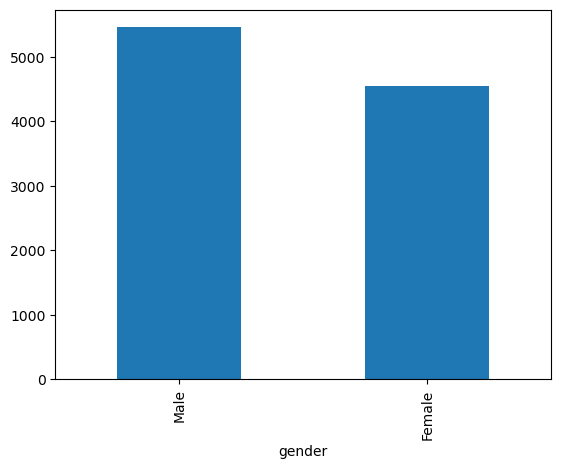

In [65]:
# Bar chart for gender distribution
churn_data['gender'].value_counts().plot.bar()



<Axes: xlabel='churn'>

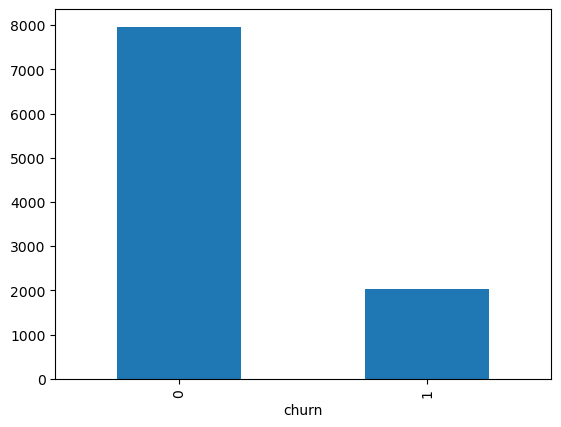

In [66]:
# Bar chart for churn (0: Still, 1: Left)
churn_data['churn'].value_counts().plot.bar()

### Numerical Data Visualization (Age and Tenure)

(array([ 142.,  469., 1030., 1149., 1819., 1810.,  984.,  887.,  568.,
         260.,  294.,  229.,  130.,   78.,   79.,   48.,   12.,    8.,
           2.,    2.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ,
        58.7, 62.4, 66.1, 69.8, 73.5, 77.2, 80.9, 84.6, 88.3, 92. ]),
 <BarContainer object of 20 artists>)

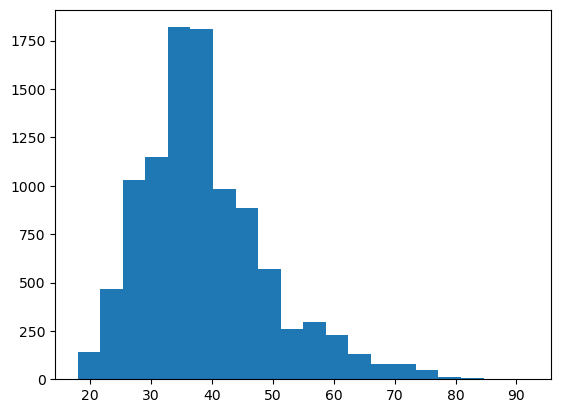

In [68]:
# Histogram for age distribution
plt.hist(churn_data['age'], bins=20)


(array([ 413.,    0., 1035.,    0., 1048.,    0., 1009.,    0.,  989.,
           0., 1012.,    0.,  967.,    0., 1028.,    0., 1025.,    0.,
         984.,  490.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

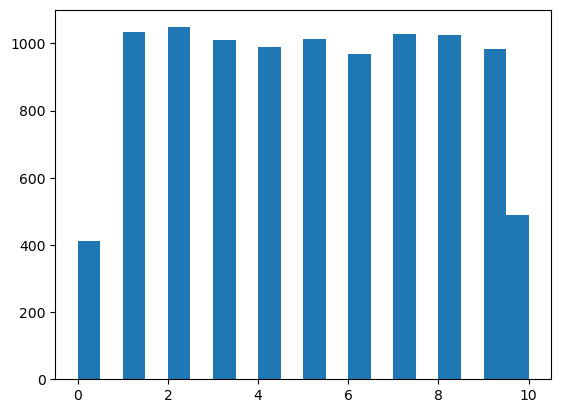

In [69]:
# Histogram for tenure distribution
plt.hist(churn_data['tenure'], bins=20)


C:\Users\Star\AppData\Local\Temp\ipykernel_19576\3021941227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data['age'])


<Axes: xlabel='age', ylabel='Density'>

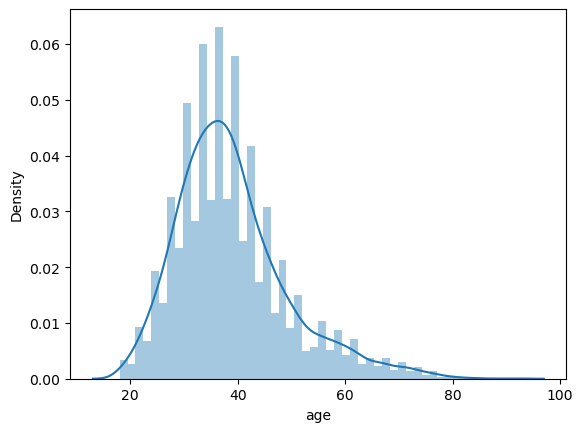

In [70]:
# Distribution plot for age
sns.distplot(churn_data['age'])


<Axes: ylabel='age'>

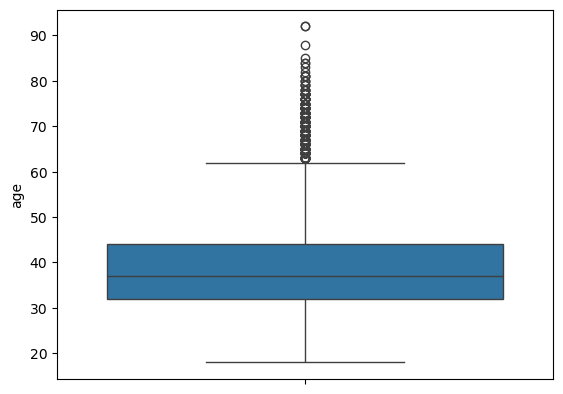

In [71]:
# Boxplot for age to detect outliers    dot line known as the outliers in the dataset 
sns.boxplot(churn_data['age'])

## 4. Data Encoding

### Gender Encoding

In [74]:
#(Male=1, Female=0)
churn_data['gender'] = churn_data['gender'].map({'Male': 1, 'Female': 0})

### Country Encoding

In [76]:
# Encoding 'country' column using LabelEncoder

le = LabelEncoder()
churn_data['country'] = le.fit_transform(churn_data['country'])

churn_data.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## 5. Splitting Data into Features and Target

In [85]:
# Features (X) and Target (y)
X = churn_data.drop('churn', axis=1)
y = churn_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8000, 10) (2000, 10) (8000,) (2000,)


## 6. Standardization

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 7. Model Training and Evaluation

##### we train multiple classification models (Logistic Regression, Decision Tree, and Random Forest) and evaluate them using accuracy, confusion matrix, and classification report.


In [92]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [94]:

from sklearn.linear_model import LogisticRegress
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


ImportError: cannot import name 'LogisticRegress' from 'sklearn.linear_model' (D:\anaconda\Lib\site-packages\sklearn\linear_model\__init__.py)

##  8. Model Selection

In [97]:
# (Random Forest) for prediction
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.868


## 9.Prediction Function

In [100]:
# Prediction function to predict churn for new customer data
def prediction_model(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary):
    input_data = np.array([[credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary]])
    pred = model.predict(input_data).reshape(1, -1)
   



# Example input
credit_score = 619
country = 0  
gender = 0   
age = 42
tenure = 2
balance = 0.00
products_number = 1
credit_card = 1
active_member = 1
estimated_salary = 101348.88

# Make prediction
pred = prediction_model(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary)

# Print the result
if pred == 0:
    print('The customer is still active')
else:
    print('The customer will leave the bank')


The customer will live the bank


 ## 10. Model Serialization

In [105]:

# Serialize the trained model and dataset
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(churn_data, open('churn_data.pkl', 'wb'))


 ###  Conclusion
 ##### By following the steps outlined above, you can load data, preprocess it, train a machine learning model, evaluate its performance, and create a predictive model that can be used for churn prediction in the banking industry. The trained model has been serialized for future use and prediction.